# **Project Name : HR Analytics - Attrition Analysis**

#### **Project Type**: Exploratory Data Analysis  
#### **Contribution**: Individual  
### **Author**: *Vaishnavi Jain*

# **Project Summary** :
* The goal is to investigate the causes of employee attrition to support better retention
* Performed data cleaning and explored the HR dataset thoroughly
* Analyzed important features such as number of projects, tenure, satisfaction, promotions, salary, and department
* Created visualizations to understand how these factors relate to employee turnover
* Assessed attrition rates across departments to identify areas with higher turnover
* Revealed key patterns linking workload and satisfaction to employees leaving, aiding HR strategies

# **Problem Statement :**
Employee attrition creates challenges for companies by increasing costs and losing talent. This project aims to analyze HR data to find reasons behind attrition and suggest ways to retain employees.

# ***Let's Begin !***

# **Step-1 : Import Libraries**

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import seaborn as sns
import matplotlib.pyplot as plt

#configuration libraries
import warnings
warnings.filterwarnings('ignore')


# **Step-2 : Data Loading**

#### **Upload CSV File to Colab**

In [2]:
# Upload files from local system
from google.colab import files
uploaded=files.upload()

Saving HR_DataSet.csv to HR_DataSet.csv


#### **Read csv file**

In [4]:
# Load the dataset into a DataFrame
df=pd.read_csv('HR_DataSet.csv')

In [7]:
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


#### **Understand the given variables :**
* satisfaction_level: Employee’s overall job satisfaction.
* last_evaluation: Result of the employee’s most recent performance review.
* number_project: Total projects completed by the employee.
* average_montly_hours: Average hours worked by the employee each month.
* time_spend_company: How many years the employee has worked at the company.
* Work_accident: Indicates if the employee experienced a workplace accident.
* left: Indicates if the employee has left the company.
* promotion_last_5years: Indicates if the employee received a promotion in the last five years.
* Department: The department where the employee works.
* salary: The employee’s salary level.

In [8]:
# Print the number of rows and columns in dataset
a = df.shape
print(f'The rows are: {a[0]} and columns are {a[1]}')

The rows are: 14999 and columns are 10


In [9]:
# Display all column names
df.columns

Index(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident', 'left',
       'promotion_last_5years', 'Department', 'salary'],
      dtype='object')

In [10]:
#Information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   Department             14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [11]:
# Statistical summary of df
df.describe().T

,count,mean,std,min,25%,50%,75%,max
satisfaction_level,14999.0,0.612834,0.248631,0.09,0.44,0.64,0.82,1.0
last_evaluation,14999.0,0.716102,0.171169,0.36,0.56,0.72,0.87,1.0
number_project,14999.0,3.803054,1.232592,2.00,3.00,4.00,5.00,7.0
average_montly_hours,14999.0,201.050337,49.943099,96.00,156.00,200.00,245.00,310.0
time_spend_company,14999.0,3.498233,1.460136,2.00,3.00,3.00,4.00,10.0
Work_accident,14999.0,0.144610,0.351719,0.00,0.00,0.00,0.00,1.0
left,14999.0,0.238083,0.425924,0.00,0.00,0.00,0.00,1.0
promotion_last_5years,14999.0,0.021268,0.144281,0.00,0.00,0.00,0.00,1.0


# **Step-3 : Data Wrangling & Exploration**

#### **Missing values**

In [12]:
# Check missing values in each column
df.isnull().sum()

,0
satisfaction_level,0
last_evaluation,0
number_project,0
average_montly_hours,0
time_spend_company,0
Work_accident,0
left,0
promotion_last_5years,0
Department,0
salary,0


No null values in the dataset

#### **Check Duplicates**

In [13]:
#check duplicate rows
df.duplicated().sum()

np.int64(3008)

In [14]:
#drop all duplicated rows
df.drop_duplicates(inplace=True)

In [59]:
# Check unique values in 'left' column (employee attrition)
df['left'].unique()

array([1, 0])

In [60]:
# Count of each unique value in 'left' column
df['left'].value_counts()

,count
left,
0,11428
1,3571


Observations:
* About 24% of employees have left the company, indicating a significant attrition rate.
* The remaining 76% of employees continue to work, highlighting potential areas to improve retention.

## **Analysis of Project Count vs Attrition**

In [20]:
# Unique values in 'number_project'
df['number_project'].unique()

[2 5 7 6 4 3]


In [62]:
# Count of unique values in 'number_project'
df['number_project'].value_counts()

,count
number_project,
4,4365
3,4055
5,2761
2,2388
6,1174
7,256


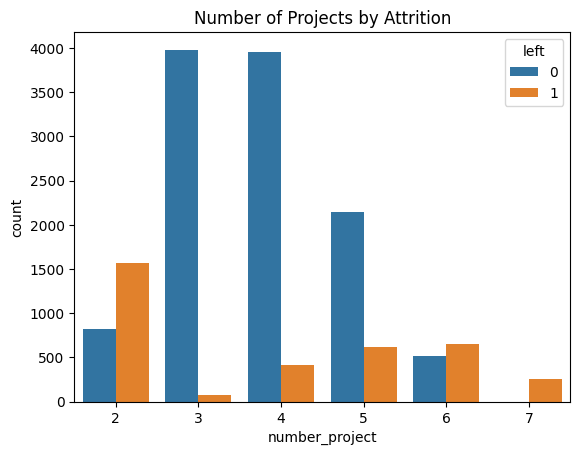

In [22]:
# Countplot of number of projects, with hue as 'left' (attrition)
sns.countplot(data=df, x='number_project', hue='left')
plt.title("Number of Projects by Attrition")
plt.show()

**Observations:**
* Most employees handle 3–5 projects, indicating typical workload range.
* A smaller group works on 6–7 projects, suggesting possible overload and risk of attrition.


## **Filtering Data for >5 Projects**

In [24]:
no_proj = df[df['number_project'] > 5]
no_proj.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
6,0.10,0.77,6,247,4,0,1,0,sales,low
11,0.11,0.81,6,305,4,0,1,0,sales,low
20,0.11,0.83,6,282,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low


In [29]:
#Unique values for 'time_spend_company'
no_proj['time_spend_company'].unique()

array([ 4,  2,  5,  3,  6, 10,  8,  7])

In [31]:
# counts of time spent in company for employees with >5 projects
no_proj['time_spend_company'].value_counts()

,count
time_spend_company,
4,883
5,218
3,143
6,87
2,67
10,12
7,12
8,8


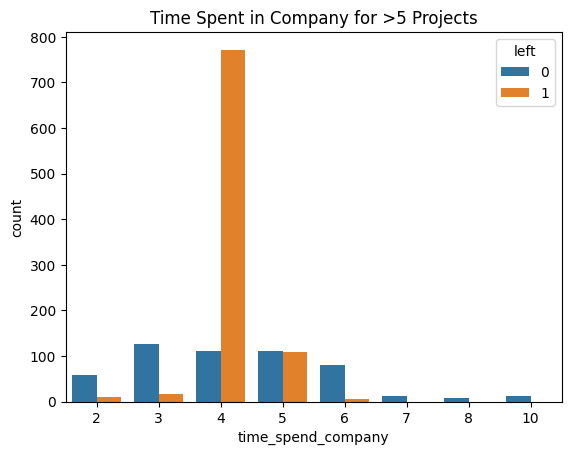

In [32]:
# Countplot of time spent in company with hue 'left' for employees with >5 projects
sns.countplot(data=no_proj, x='time_spend_company', hue='left')
plt.title("Time Spent in Company for >5 Projects")
plt.show()

**Observations:**
* Most employees tend to stay around 3 to 5 years at the company.
* There are relatively few employees with 7 years or more.
* The drop in employee count as tenure increases could indicate natural attrition or a challenge in retaining employees long-term.

## **Further Filtering: Projects >5 and Time Spent <5 years**

In [63]:
df2 = no_proj[no_proj['time_spend_company'] < 5]
df2

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
2,0.11,0.88,7,272,4,0,1,0,sales,medium
6,0.10,0.77,6,247,4,0,1,0,sales,low
11,0.11,0.81,6,305,4,0,1,0,sales,low
20,0.11,0.83,6,282,4,0,1,0,sales,low
22,0.09,0.95,6,304,4,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14972,0.11,0.97,6,310,4,0,1,0,accounting,medium
14975,0.10,0.79,7,310,4,0,1,0,hr,medium
14979,0.09,0.93,6,296,4,0,1,0,technical,medium
14991,0.09,0.81,6,257,4,0,1,0,support,low


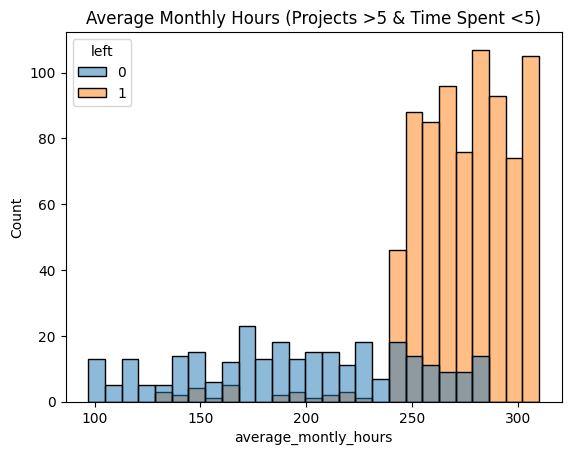

In [34]:
# Histogram of average monthly hours with hue 'left' for filtered data
sns.histplot(data=df2, x='average_montly_hours', hue='left')
plt.title("Average Monthly Hours (Projects >5 & Time Spent <5)")
plt.show()

Observations:
*  High average monthly hours (250–310) are linked with a high attrition rate.
*  Moderate hours (100–240) are associated with higher retention
* Indicates burnout risk for high-performing, overworked employees.

In [36]:
# Salary counts for employees working less than 235 hours/month
df2[df2['average_montly_hours'] < 235]['salary'].value_counts()

,count
salary,
low,121
medium,101
high,22


In [37]:
# Department counts for employees working less than 235 hours/month
df2[df2['average_montly_hours'] < 235]['Department'].value_counts()

,count
Department,
sales,71
technical,47
support,35
IT,20
product_mng,20
accounting,14
RandD,12
management,10
marketing,10


In [38]:
# Salary counts for employees working 235 or more hours/month
df2[df2['average_montly_hours'] >= 235]['salary'].value_counts()

,count
salary,
low,504
medium,323
high,22


Observations:
* Most employees working long hours are in low/medium salary bands.
* Few high-salary employees work long hours, suggesting role or workload differences.
* This imbalance could drive dissatisfaction and attrition.







In [40]:
# Department counts for employees working 235 or more hours/month
df2[df2['average_montly_hours'] >= 235]['Department'].value_counts()


,count
Department,
sales,220
technical,197
support,118
IT,68
accounting,57
product_mng,46
hr,46
marketing,39
management,32


## **Department Analysis**

In [41]:
#unique values for 'Department'
print(df['Department'].unique())

['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']


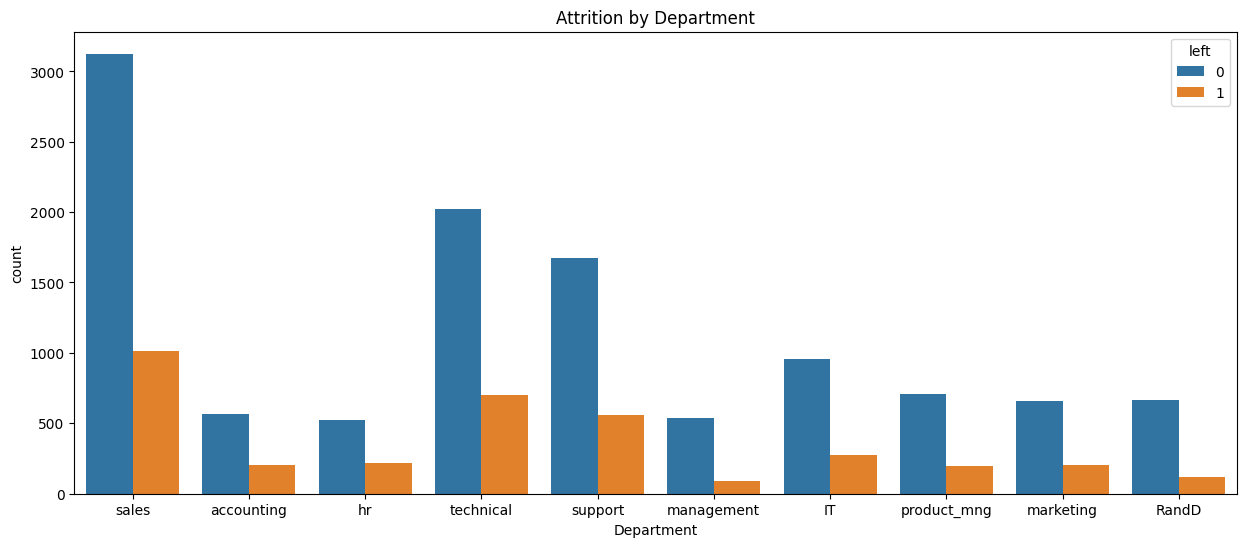

In [44]:
plt.figure(figsize=(15, 6))
sns.countplot(data=df, x='Department', hue='left')
plt.title("Attrition by Department")
plt.show()

In [46]:
# Calculate attrition rate (%) per department
print("Attrition rate (%) per Department:")
for dept in df['Department'].unique():
    left_count = len(df[(df['Department'] == dept) & (df['left'] == 1)])
    total = len(df[df['Department'] == dept])
    attrition_rate = np.round(left_count * 100 / total, 3)
    print(f"{dept}: {attrition_rate}%")

Attrition rate (%) per Department:
sales: 24.493%
accounting: 26.597%
hr: 29.093%
technical: 25.625%
support: 24.899%
management: 14.444%
IT: 22.249%
product_mng: 21.951%
marketing: 23.66%
RandD: 15.375%


In [48]:
# Create a DataFrame with attrition % by department
attrition_df = pd.DataFrame()
attrition_df['Departments'] = df['Department'].unique()
attrition_rates = []

for dept in df['Department'].unique():
    left_count = len(df[(df['Department'] == dept) & (df['left'] == 1)])
    total = len(df[df['Department'] == dept])
    attrition_rates.append(np.round(left_count * 100 / total, 3))

attrition_df['Attrition in %'] = attrition_rates
attrition_df

,Departments,Attrition in %
0,sales,24.493
1,accounting,26.597
2,hr,29.093
3,technical,25.625
4,support,24.899
5,management,14.444
6,IT,22.249
7,product_mng,21.951
8,marketing,23.660
9,RandD,15.375


**Observations:**
* Sales has the highest exit count but moderate attrition %, likely due to size.
* HR, Accounting, and Technical teams face higher attrition rates.
* R&D and Management show stronger employee retention.


In [50]:
# Groupby Department and left status
df.groupby(['Department', 'left']).size().reset_index()

,Department,left,0
0,IT,0,954
1,IT,1,273
2,RandD,0,666
3,RandD,1,121
4,accounting,0,563
5,accounting,1,204
6,hr,0,524
7,hr,1,215
8,management,0,539
9,management,1,91


## **Promotion Analysis**

In [51]:
df['promotion_last_5years'].value_counts()

,count
promotion_last_5years,
0,14680
1,319


**Observations:**
* Very few employees received a promotion in the last 5 years — indicating limited career growth opportunities.
* This lack of promotion may contribute to employee dissatisfaction and higher attrition rates.


## **Satisfaction & Evaluation Analysis**

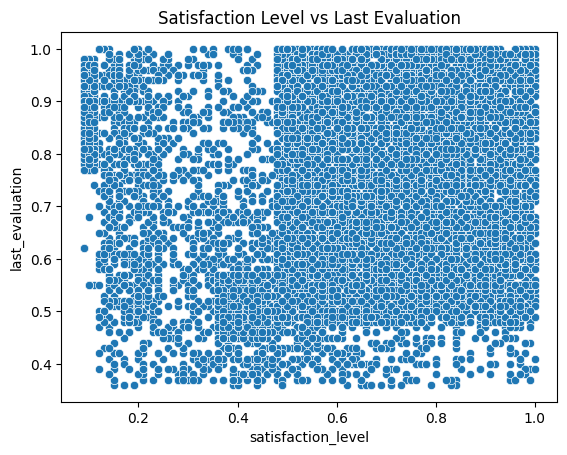

In [52]:
# Scatterplot: satisfaction level vs last evaluation
sns.scatterplot(data=df, x='satisfaction_level', y='last_evaluation')
plt.title("Satisfaction Level vs Last Evaluation")
plt.show()

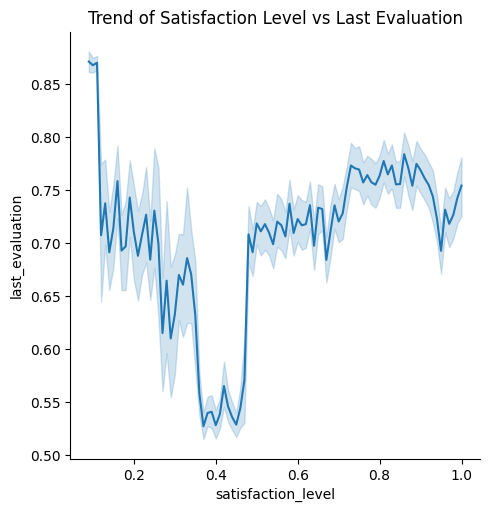

In [53]:
# Line plot using relplot (shows trend)
sns.relplot(data=df, x='satisfaction_level', y='last_evaluation', kind='line')
plt.title("Trend of Satisfaction Level vs Last Evaluation")
plt.show()

**Observations:**
* Low satisfaction with high evaluation indicates possible burnout among top performers.
* Decreasing satisfaction often corresponds with lower performance scores.
* Higher satisfaction aligns with better performance — showing a healthy engagement.


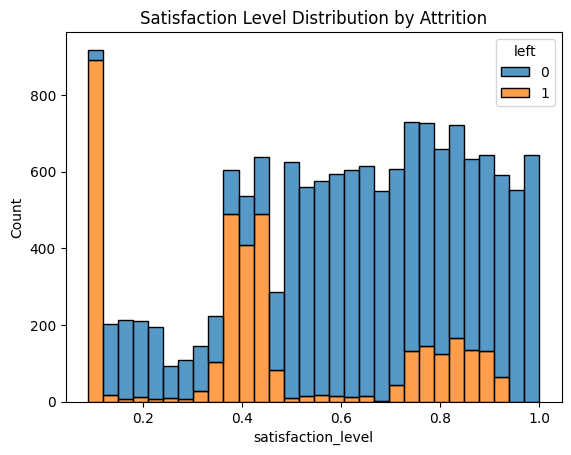

In [54]:
# Histogram of satisfaction level, colored by 'left'
sns.histplot(data=df, x='satisfaction_level', hue='left', multiple='stack')
plt.title("Satisfaction Level Distribution by Attrition")
plt.show()

Observations:
* Most employees who left had very low or very high satisfaction levels, indicating dissatisfaction or possibly feeling undervalued despite high satisfaction.
* Employees with moderate satisfaction levels mostly stayed, showing stability in that range.
* Both extremes of satisfaction can be a risk factor for attrition

## **Correlation Analysis**

In [56]:
# Compute correlation matrix for numerical columns only
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000


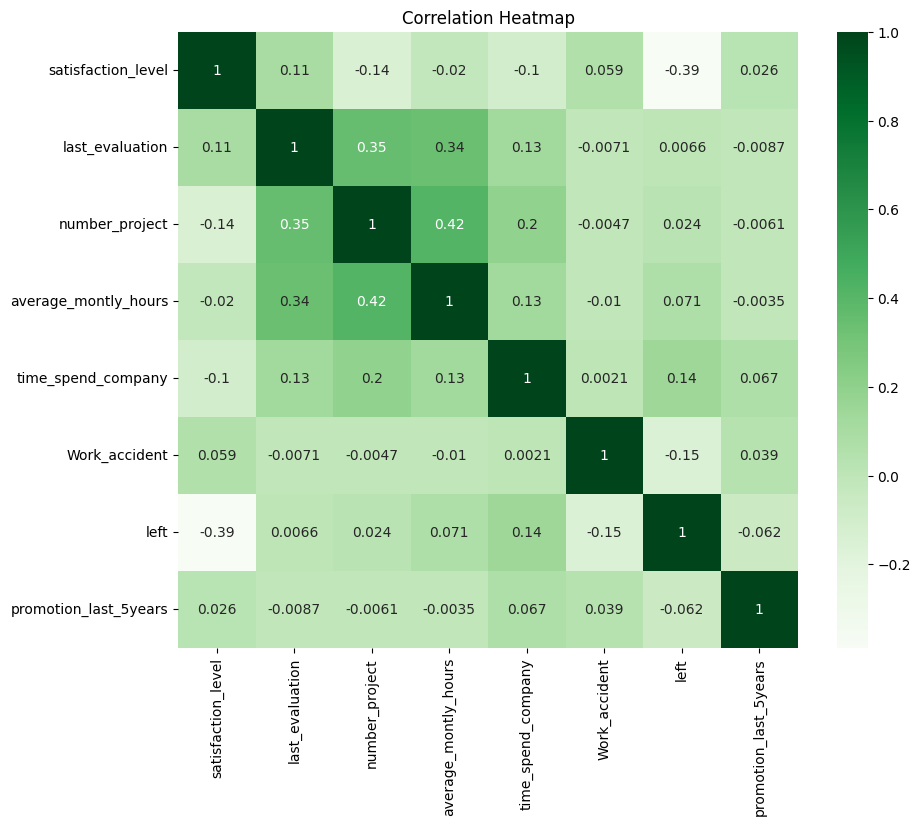

In [58]:
# Heatmap of correlation matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='Greens')
plt.title("Correlation Heatmap")
plt.show()

Observations:
* Satisfaction level has a strong negative correlation with attrition, indicating that employees with lower satisfaction are more likely to leave.
* Time spent at the company shows a positive link with attrition, suggesting that longer tenure might lead to higher chances of leaving — possibly due to burnout or stagnation.
* Work accidents are negatively correlated with attrition, implying those who experienced accidents are less likely to leave, possibly due to job security or support systems.
* Promotions have a slight negative correlation with attrition, meaning employees who haven't been promoted may be more likely to leave.

# **Business Conclusion**:

* **Employee satisfaction** is a key driver of retention: Low satisfaction strongly correlates with higher attrition. Improving workplace environment, recognition, and job fulfillment should be a priority.

* **Workload management** is critical: Employees handling more than 5 projects or working excessive hours show higher attrition rates. Balancing workload can reduce burnout and turnover.

* **Promotion** and career growth opportunities are limited: Very few employees receive promotions, which may lead to frustration and increased attrition. Enhancing career development programs could improve retention.

* **Department-specific attrition varies**: Sales and technical roles show higher attrition counts, while departments like HR and accounting experience higher attrition rates percentage-wise. Tailored retention strategies are needed per department.

* **Compensation alignment** with effort is lacking: Most employees working long hours fall in low to medium salary brackets, which may contribute to dissatisfaction and exits. Reviewing salary structures to better reward effort may help retain talent.

* **Recommendation:** HR should focus on improving employee satisfaction, workload balance, career progression to reduce attrition in company.